## Initialization

In [1]:
import blackhc.notebook

Appended C:\Users\black\PycharmProjects\BatchBALD\src to paths
Switched to directory C:\Users\black\PycharmProjects\BatchBALD
%load_ext autoreload
%autoreload 2


In [3]:
import al_notebook.results_loader as rl
import al_notebook.plots as alp
from acquisition_functions import AcquisitionFunction
from acquisition_method import AcquisitionMethod
from dataset_enum import DatasetEnum

In [4]:
import numpy as np

In [5]:
import prettyprinter as pp

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
#MARKERS = ("X", "s", "o")
MARKERS = None

## Common functions


In [9]:
def acc_label_axes():
    plt.xlabel('Acquired dataset size')
    plt.ylabel('Accuracy')

## RMNIST

In [10]:
stores_rmnist = rl.load_experiment_results('paper')

In [11]:
len(stores_rmnist)

159

### RMNIST ablation study

{
    'acquisition_method': {
        acquisition_method.AcquisitionMethod.multibald,
        acquisition_method.AcquisitionMethod.independent
    },
    'experiment_description': {
        'RMNIST with noise k10 b5 and b10 (and k100 b10), BALD, BatchBALD and '
            'heuristic',
        'Additional paper experiments (#1): RMNIST w/ noise, MNIST w/ noise, '
            'MNIST, with initial samples'
    },
    'dataset': {
        dataset_enum.DatasetEnum.repeated_mnist_w_noise5,
        dataset_enum.DatasetEnum.repeated_mnist_w_noise,
        dataset_enum.DatasetEnum.repeated_mnist_w_noise2,
        dataset_enum.DatasetEnum.mnist_w_noise
    },
    'experiments_laaos': {
        './experiment_configs/rmnist_w_noise/configs.py',
        'experiment_configs/rmnist_w_noise_2_5/configs.py',
        './experiment_configs/paper_exp1/configs.py'
    },
    'num_acquired_points': {320, 300},
    'balanced_validation_set': {False, None},
    'balanced_test_set': {False, None}
}
{
    'BAL

        'reduce_percentage': {0},
        'min_remaining_percentage': {100},
        'min_candidates_per_acquired_item': {100},
        'dataset': {dataset_enum.DatasetEnum.repeated_mnist_w_noise},
        'experiments_laaos': {
            './experiment_configs/rmnist_w_noise/configs.py'
        },
        'quickquick': {False},
        'initial_samples_per_class': {2},
        'num_acquired_points': {300},
        'num_initial_samples': {20},
        'tag': {'paper'}
    }
}
BatchBALD (4 reps):
85% at [50 60 70]
90% at [ 90 100 110]
95% at [250 260 270]
BALD (0 reps):
85% at [ 70.  90. 100.]
90% at [120. 120. 160.]
95% at [250. 270. 290.]
BALD (1 reps):
85% at [ 80. 100. 130.]
90% at [160. 160. 190.]
95% at [inf inf inf]
BALD (2 reps):
85% at [140. 170. 180.]
90% at [260. 280.  inf]
95% at [inf inf inf]
BALD (4 reps):
85% at [130. 160. 200.]
90% at [240. 300.  inf]
95% at [inf inf inf]


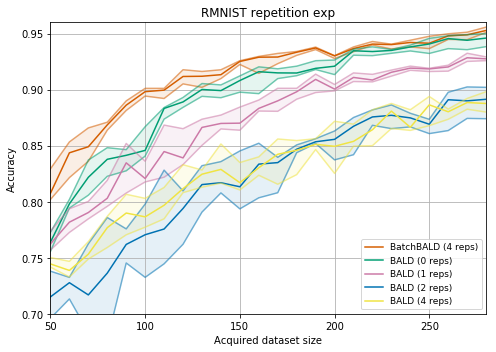

In [13]:
for show_b in (10, ):
    filtered = {}

    def filter_exps(name, store):
        vip_args = rl.get_vip_args(store)

        if vip_args.ds not in (DatasetEnum.repeated_mnist_w_noise,
                               DatasetEnum.mnist_w_noise,
                               DatasetEnum.repeated_mnist_w_noise2,
                               DatasetEnum.repeated_mnist_w_noise5):
            return False

        if vip_args.nis == 0:
            return False

    #     if vip_args.nap < 300:
    #         return False

        if (vip_args.am, vip_args.af) not in ((AcquisitionMethod.multibald,
                                               AcquisitionFunction.bald),
                                              (AcquisitionMethod.independent,
                                               AcquisitionFunction.bald),
                                              #(AcquisitionMethod.independent,
                                              # AcquisitionFunction.random)
                                             ):
            return False
        
        
        if vip_args.am == AcquisitionMethod.multibald:
            if vip_args.ds != DatasetEnum.repeated_mnist_w_noise5:
                return False

        if vip_args.af == AcquisitionFunction.bald:
            if vip_args.k not in (10, ):
                return False

            if vip_args.b not in (show_b, ):
                return False
        return True

    filtered.update(rl.filter_dict(stores_rmnist, kv=filter_exps))

    pp.pprint(rl.diff_args(filtered))

    def key2text(name, store):

        vip_args = rl.get_vip_args(store)
        am, af = vip_args.am, vip_args.af
        ds = vip_args.ds
        num_repetitions = {
            DatasetEnum.mnist_w_noise: 0,
            DatasetEnum.repeated_mnist_w_noise: 2,
            DatasetEnum.repeated_mnist_w_noise2: 1,
            DatasetEnum.repeated_mnist_w_noise5: 4
        }[ds]

        if (am, af) == (AcquisitionMethod.independent,
                        AcquisitionFunction.random):
            return 'Random (all)'
        elif (am, af) == (AcquisitionMethod.independent,
                          AcquisitionFunction.bald):
            return f'BALD ({num_repetitions} reps)'
        elif (am, af) == (AcquisitionMethod.multibald,
                          AcquisitionFunction.bald):
            return f'BatchBALD ({num_repetitions} reps)'
        else:
            raise ValueError(vip_args)
        
    #grouped_by = rl.groupby_dict(filtered, key_kv=rl.get_diff_args_key2text(filtered, ('tag',)))
    grouped_by = rl.groupby_dict(filtered, key_kv=key2text)

    pp.pprint(
        rl.map_dict(grouped_by, v=lambda stores: rl.get_stores_info(stores)))

    grouped_by = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_accuracies(stores, thresholds=(85, 90, 95)))

    sorted_dict = rl.sort_dict(grouped_by, v=rl.get_threshold_quantiles_key)

    plt.figure(figsize=(7, 5))
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict,
                               show_num_trials=False,
                               show_quantiles=False,
                               show_thresholds=False)
    plt.axis([50, 280, 0.7, 0.96])
    acc_label_axes()
    plt.grid(True)
    plt.legend(loc='lower right', fontsize=9)
    plt.title("RMNIST repetition exp")
    plt.tight_layout()

    output_path = blackhc.notebook.original_dir + '/RMNIST_ablation_poster.pdf'
    alp.plot_save(output_path)
    plt.show()

## CINIC10

In [14]:
stores_cinic10 = stores_rmnist

In [15]:
len(stores_cinic10)

159

### CINIC10

{
    'acquisition_method': {
        acquisition_method.AcquisitionMethod.multibald,
        acquisition_method.AcquisitionMethod.independent
    },
    'initial_samples': {
        (
            175625,
            83927,
            82616,
            85656,
            85511,
            173978,
            178296,
            84839,
            171094,
            85922,
            82234,
            171293,
            173785,
            83635,
            178024,
            171598,
            176883,
            81731,
            177912,
            179940,
            125042,
            118699,
            35438,
            120390,
            125906,
            117728,
            124301,
            35687,
            125646,
            34313,
            119522,
            119199,
            29000,
            120874,
            121386,
            28911,
            27711,
            118506,
            34226,
            119439,
            18526,
            

                38415,
                134684,
                42990,
                41709,
                42278,
                130956,
                94090,
                289,
                8984,
                294,
                7860,
                2497,
                93574,
                94555,
                5274,
                8762,
                1800,
                95439,
                93545,
                91021,
                7900,
                3773,
                95172,
                90486,
                2,
                92917,
                104980,
                12957,
                12842,
                106634,
                99911,
                14598,
                16697,
                107837,
                10488,
                15136,
                15459,
                14833,
                104663,
                14828,
                107669,
                102885,
                101266,
                10

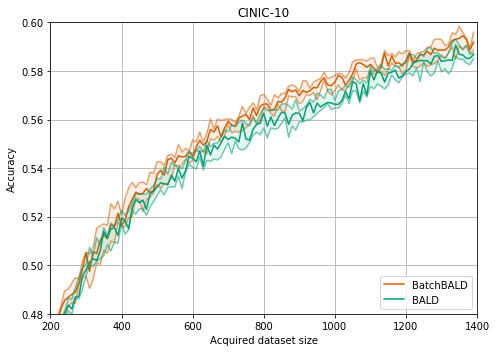

In [16]:
for show_b in (10,):
    filtered = {}

    def filter_exps(name, store):
        vip_args = rl.get_vip_args(store)
        if vip_args.nap < 1200:
            return False

        if vip_args.ds not in (DatasetEnum.cinic10,):
            return False

    #     if vip_args.nap < 300:
    #         return False

        if (vip_args.am, vip_args.af) not in ((AcquisitionMethod.multibald,
                                               AcquisitionFunction.bald),
                                              (AcquisitionMethod.independent,
                                               AcquisitionFunction.bald),
                                              (AcquisitionMethod.independent,
                                               AcquisitionFunction.random)):
            return False

        return True

    filtered.update(rl.filter_dict(stores_cinic10, kv=filter_exps))

    pp.pprint(rl.diff_args(filtered))

    def key2text(name, store):

        vip_args = rl.get_vip_args(store)
        am, af = vip_args.am, vip_args.af
        

        if (am, af) == (AcquisitionMethod.independent,
                        AcquisitionFunction.random):
            return 'Random'
        elif (am, af) == (AcquisitionMethod.independent,
                          AcquisitionFunction.bald):
            return f'BALD'
        elif (am, af) == (AcquisitionMethod.multibald,
                          AcquisitionFunction.bald):
            return 'BatchBALD'
        else:
            raise ValueError(vip_args)

    #grouped_by = rl.groupby_dict(filtered, key_kv=rl.get_diff_args_key2text(filtered, ('tag',)))
    grouped_by = rl.groupby_dict(filtered, key_kv=key2text)

    pp.pprint(
        rl.map_dict(grouped_by, v=lambda stores: rl.get_stores_info(stores)))

    grouped_by = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_accuracies(stores, thresholds=(50, 55, 58, 59)))

    sorted_dict = rl.sort_dict(grouped_by, v=rl.get_threshold_quantiles_key)

    plt.figure(figsize=(7, 5))
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict,
                               show_num_trials=False,
                               show_quantiles=False,
                               show_thresholds=False)
    plt.axis([200, 1400, 0.48, 0.60])
    acc_label_axes()
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.title('CINIC-10')
    plt.tight_layout()

    output_path = blackhc.notebook.original_dir + '/CINIC10_poster.pdf'
    alp.plot_save(output_path)
    plt.show()